# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/visualization`
### Do One.

**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

**Q2.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them? 
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

**Q3.** This is a case study about understanding and visualizing risk over time, involving a dataset with information about breast cancer mortality rates over time, conditional on different treatments.

1. Load the `./data/Breast Cancer METABRIC.csv` dataset. It has a bunch of interesting variables, but the mains of interest for this question are `Overall Survival (Months)`, which is  and `Overall Survival Survival Status`, which records whether the patient is Alive or Deceased.
2. Make one kernel density plot of `Overall Survival (Months)`, and a second conditional on `Overall Survival Status`. Interpret these plots. What patterns do you see? 

3. The **hazard rate** gives the instantaneous risk of an event occurring, given that it hasn't already happened. It is defined as
$$
h(t) = \dfrac{f(t)}{1-F(t)}
$$
where $F(t)$ is the distribution of arrival times and $f(t)=F'(t)$ is the density of arrival times. Roughly, conditional on $T \ge t$, what is the probability that $T=t$? The cumulative hazard is given by
$$
H(t) = \int_0^t h(z) dz.
$$
The following function computes the hazard rate and cumulative hazard using something called the Nelson-Ahlen estimator. Run your data through it. Interpret the plots for the hazard rate and cumulative hazard rate. What patterns do you see?

```
def hazard(df):
    """ Compute cumulative hazard rate using Nelson-Ahlen estimator. """
    at_risk = df.shape[0]
    arrivals = df['survival'].sort_values().dropna().tolist()
    hazard_rate = []
    times = []
    for t in arrivals:
        select = (df['survival']==t)*(df['Overall Survival Status']=='Deceased')
        deaths_t = df[select].shape[0]
        if deaths_t > 0:
            hazard_rate.append(deaths_t/at_risk)
            times.append(t)
            at_risk -= deaths_t
    cumulative_hazard = np.cumsum(hazard_rate)
    return cumulative_hazard, times, hazard_rate
```

4. There are lots of additional categorical variables in the METABRIC dataset. Pick a categorical variable, and plot the hazard rate and cumulative hazard for each category. Do you see any interesting patterns? Is one group more likely to survive, or do their hazard rates cross over time?
5. These plots are very helpful for understanding how patients respond to treatment. Discuss how they might be used in practice, to help doctors and patients make decisions about care.

In [5]:
#Loading in all of the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
bric= pd.read_csv("https://raw.githubusercontent.com/ds4e/visualization/refs/heads/main/data/Breast%20Cancer%20METABRIC.csv") #Loading in the csv

In [7]:
bric.head() #Checking everything loaded in correctly

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


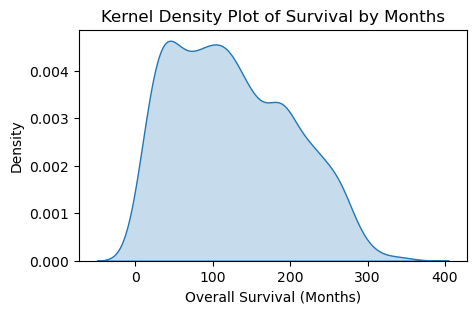

In [8]:
#Creating a Kernel Denstiy Plot of survival
plt.figure(figsize=(5, 3)) #Setting the figure size
sns.kdeplot(bric, x='Overall Survival (Months)',fill=True) #Creating the plot
plt.title("Kernel Density Plot of Survival by Months") #Adding a title
plt.show()

According to this plot patients were most likely to survive to around 100 months or less after diagnosis, this is 8 years. The number of patients who survived past 100 months decreases steadily. 

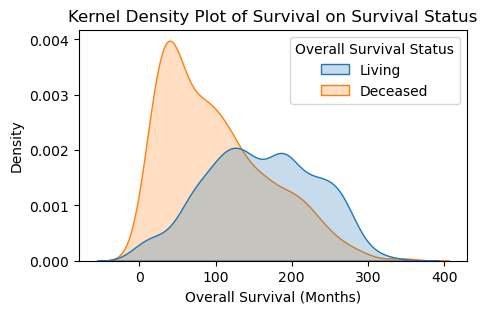

In [10]:
#Creating the Kernel Density Plot conditional on Overall Survival Status
plt.figure(figsize=(5, 3)) #Setting the size of the plot
sns.kdeplot(bric, x='Overall Survival (Months)', hue='Overall Survival Status', fill=True) #Creating the plot
plt.title("Kernel Density Plot of Survival on Survival Status") #Adding a title
plt.show()

This KDE is conditional on current survival status, and it shows that the greatest number of people who died after their diagnosis peaks around 50 months (a little less). These patients survive a little less than 4 years. This could be due to an aggressive type of breast cancer or late diagnosis. With these factors in the mix, the patient is more likely to die earlier (not later). As the overall survival of the patients increases, they seem more likely to be living. Living patients overtake the chart at around 130 months. This is most likely due to the cancer being treatable in early stages or the tumor being less aggressive. 

In [24]:
##Computing cumulative hazard rate using Nelson-Ahlen estimator.
def hazard(bric):
    at_risk = bric.shape[0]
    arrivals = bric['Overall Survival (Months)'].sort_values().dropna().tolist()
    hazard_rate = []
    times = []
    for t in arrivals:
        select = (bric['Overall Survival (Months)']==t) & (bric['Overall Survival Status']=='Deceased')
        deaths_t = bric[select].shape[0]
        if deaths_t > 0:
            hazard_rate.append(deaths_t/at_risk)
            times.append(t)
            at_risk -= deaths_t
    cumulative_hazard = np.cumsum(hazard_rate)
    return cumulative_hazard, times, hazard_rate

In [43]:
#Printing the calculated values to make sure it was done
cumulative_hazard, times, hazard_rate = hazard(bric) #Attaching these values to our defined function in order to call

print("Cumulative Hazard:", cumulative_hazard)
print("Survival Times:", times)
print("Hazard Rates:", hazard_rate)

Cumulative Hazard: [3.98565165e-04 7.97289248e-04 1.19617238e-03 ... 8.65988293e-01
 8.66936160e-01 8.67884926e-01]
Survival Times: [0.1, 2.3, 2.5333333330000003, 2.5333333330000003, 3.5, 4.166666667, 4.433333333, 5.066666667, 5.5, 5.833333333, 6.266666667000001, 6.833333333, 7.8, 7.866666667, 8.066666667, 9.066666667, 9.133333333, 9.433333333, 9.6, 9.7, 9.833333333, 10.06666667, 10.63333333, 10.83333333, 10.83333333, 10.86666667, 11.06666667, 11.3, 11.6, 11.7, 11.86666667, 11.86666667, 12.26666667, 12.93333333, 13.53333333, 13.8, 14.1, 14.13333333, 14.16666667, 14.2, 14.4, 14.43333333, 14.7, 14.8, 15.06666667, 15.06666667, 15.16666667, 15.2, 15.3, 15.36666667, 15.36666667, 15.36666667, 15.5, 15.53333333, 15.6, 15.63333333, 15.7, 15.86666667, 15.86666667, 16.16666667, 16.3, 16.56666667, 16.6, 16.7, 16.7, 16.7, 16.73333333, 16.83333333, 17.13333333, 17.2, 17.66666667, 17.93333333, 18.23333333, 18.26666667, 18.8, 18.83333333, 18.93333333, 19.0, 19.0, 19.03333333, 19.1, 19.16666667, 19.4,

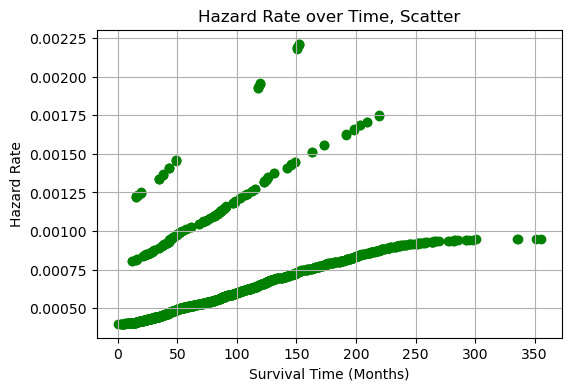

In [27]:
#Creating a Hazard Rate Plot, using a scatterplot since the rates are instantaneous
plt.figure(figsize=(6, 4)) #Setting figure size
plt.scatter(times, hazard_rate, color='g', label="Hazard Rate") #Creating the scatterplot
plt.xlabel("Survival Time (Months)") #Labeling the x-axis
plt.ylabel("Hazard Rate") #Labeling the y-axis
plt.title("Hazard Rate over Time, Scatter")
plt.grid(True)
plt.show()

The most distinc pattern I see in the hazard rate over time graph is the presence of three distinct lines. I suspect that there is another variable causing the hazard rates to be so distinct. This most likely has to do with the tumour type or stage of diagnosis. The hazard rate jumps significantly in the first 5 months which is what allows me to conclude this. 

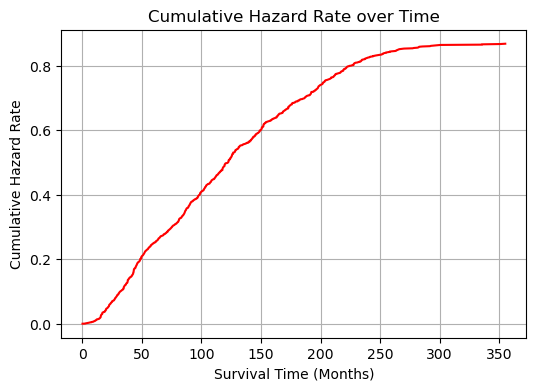

In [31]:
#Creating a Cumulative Hazard Rate over Time line plot
plt.figure(figsize=(6, 4)) #Setting plot size
sns.lineplot(x=times, y=cumulative_hazard, color='r') #Creating the line plot
plt.title("Cumulative Hazard Rate over Time") #Adding a title
plt.xlabel("Survival Time (Months)") #Labeling the x-axis
plt.ylabel("Cumulative Hazard Rate") #Labeling the y-axis
plt.grid(True)
plt.show()

The cumulative hazard rate graph is increasing steadily over time. This makes sense, for as the time goes on, the patient is more likely to decline or be deceased. At a certain point the cumultative hazard rate starts to level off.

In [33]:
#Creating a function that calculates the hazard rates and cumulative rates by group
def hazard_by_group(bric, group_column):
    grouped_hazards = {}

    for group in bric[group_column].dropna().unique():  # Loop through unique categories
        subset = bric[bric[group_column] == group]  # Filter data for the group
        at_risk = subset.shape[0]
        arrivals = subset['Overall Survival (Months)'].sort_values().dropna().tolist()
        hazard_rate = []
        times = []

        for t in arrivals:
            select = (subset['Overall Survival (Months)'] == t) & (subset['Overall Survival Status'] == 'Deceased')
            deaths_t = subset[select].shape[0]

            if deaths_t > 0:
                hazard_rate.append(deaths_t / at_risk)
                times.append(t)
                at_risk -= deaths_t

        cumulative_hazard = np.cumsum(hazard_rate)
        grouped_hazards[group] = (times, hazard_rate, cumulative_hazard) #Return the measures that we need

    return grouped_hazards

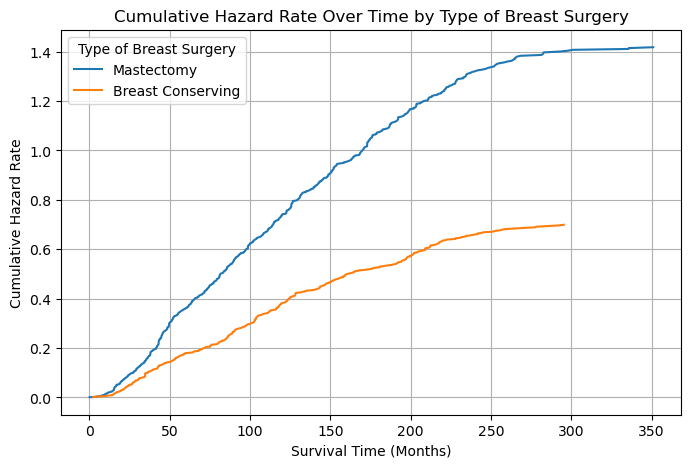

In [34]:
grouped_hazards = hazard_by_group(bric, "Type of Breast Surgery") #Specifying that we are interested in these measures for the "Type of Breast Surgery" variable

plt.figure(figsize=(8, 5)) #Setting plot size
for surgery_type, (times, hazard_rate, cumulative_hazard) in grouped_hazards.items(): #plotting
    plt.plot(times, cumulative_hazard, label=f"{surgery_type}") #Specifying that we wanr cumulative hazard by surgery type

plt.xlabel("Survival Time (Months)") #Labeling x-axis
plt.ylabel("Cumulative Hazard Rate") #Laveling y-axis
plt.title("Cumulative Hazard Rate Over Time by Type of Breast Surgery") #Adding a title
plt.legend(title="Type of Breast Surgery") #Labeling the legend
plt.grid(True)
plt.show()

We can see that the hazard rates of patients with mastectomies increases at a greater rate than of patients who didn't get one. This is most likely due to these patients having a more aggressive form of breast cancer. Those patients who conserved their breasts had an overall lower cumulative hazard rate, but didn't survive as long according to this sample. This could be because overall, mastectomies increase survival rate or decrease the likelihood of cancer spreading. 

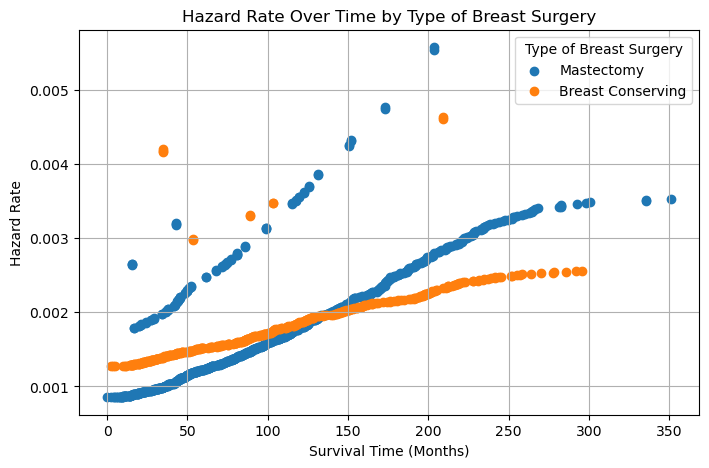

In [39]:
grouped_hazards = hazard_by_group(bric, "Type of Breast Surgery") #Specifying that we are looking at the "Types of Breast Surgery"

plt.figure(figsize=(8, 5)) #Setting the plot size
for surgery_type, (times, hazard_rate, cumulative_hazard) in grouped_hazards.items(): #unpacking our function for necessary measures
    plt.scatter(times, hazard_rate, label=f"{surgery_type}") #Plotting the scatterplot 

plt.xlabel("Survival Time (Months)") #label x-axis
plt.ylabel("Hazard Rate") #label y-axis
plt.title("Hazard Rate Over Time by Type of Breast Surgery") #Adding a title
plt.legend(title="Type of Breast Surgery") #Labeling the legend
plt.grid(True)
plt.show()

When we graph the hazard rates of patients who opted for either of the two treatments we see that the main lines of hazard rates cross at about 130 months of survival. This is showing that patients who may have more aggressive cancers with low survival times,face a lower risk (generally) getting a mastectomy and that breast conservation can be more dangerous. A very important variable here is the cancer type, and cancer stage as well. This decision to get a mastectomy or not is a reaction, so there is more to the story here! After about 130 months it seems that the cancer evolves and patients attempt to get mastectomies. 

5. Like I touched on in the above plot, this visualization of hazard risk can be helpful in making decisions regarding treatment. For example, we see that the hazard risk of breast conversation can be greater. Mastectomies can help prolong the survival rate of patients in the long term (this is clearly seen on the cumulative graph. Depending on the nature of the disease, a mastectomy may not always be 100% effective (this is obvious when the hazard rates of the two paths cross). Localized breast cancers can be stopped in their early stages with this procedure. These graphs can be useful for examination of any disease and any treatment type. It might be helpful to graph hazard risk by the specific aggressiveness of cancer, and then look at hazard risk!

**Q4.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use a data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform 
$$
k(z) = \begin{cases} 
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is 
$$
k(z) = \begin{cases} 
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.